### Decision Tree

Problem Statement: Built A Decision Tree On The Iris Dataset From SeaBorn

In [1]:
#Importing the Required Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
#Loading the Dataset From Seaborn (iris)
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Inferences: As the Y variable is Categorical it need to be converted into numberical, as it is Y Variable will Use Label Encoder

In [3]:
#Complete Iris dataset - applying lable encoder to species column
label_encoder = preprocessing.LabelEncoder()
iris['species'] = label_encoder.fit_transform(iris['species']) 
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# seprating x and y(class) variables 
x= iris.iloc[:,0:4]
y= iris['species']

In [5]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

Inferences: Now the X & Y variables are splitted from the Dataset

In [7]:
# to check unique values in specified column
iris['species'].unique()

array([0, 1, 2])

In [8]:
# to count total values for distinct/unique value
iris.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

Inference: This is a Balanced Dataset.

When the Observation/Values are Equally Distributed along the all the Classes then it called Balanced Dataset.when They are not Equally Distributed then it is Called Inbalance Dataset 

In [9]:
# to list name of columns
colnames = list(iris.columns)
colnames

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [10]:
# Splitting data into training and testing data set
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

Inference: Made a Train-Test Split of 80% - 20%

In [11]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
62,6.0,2.2,4.0,1.0
23,5.1,3.3,1.7,0.5
26,5.0,3.4,1.6,0.4
48,5.3,3.7,1.5,0.2
2,4.7,3.2,1.3,0.2
...,...,...,...,...
71,6.1,2.8,4.0,1.3
12,4.8,3.0,1.4,0.1
50,7.0,3.2,4.7,1.4
7,5.0,3.4,1.5,0.2


In [12]:
y_train

62    1
23    0
26    0
48    0
2     0
     ..
71    1
12    0
50    1
7     0
70    1
Name: species, Length: 120, dtype: int32

#### Building Decision Tree Classifier using Entropy Criteria -- C5.0

In [13]:
#applying DT classifier with criteria and depth on train models
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Inference: Model is Fitted, The Decision Tree is of C5.0 Technique, Pruning is Set using the Hyperparameter of max_depth = 3, while means only Three Split/Node will be there.

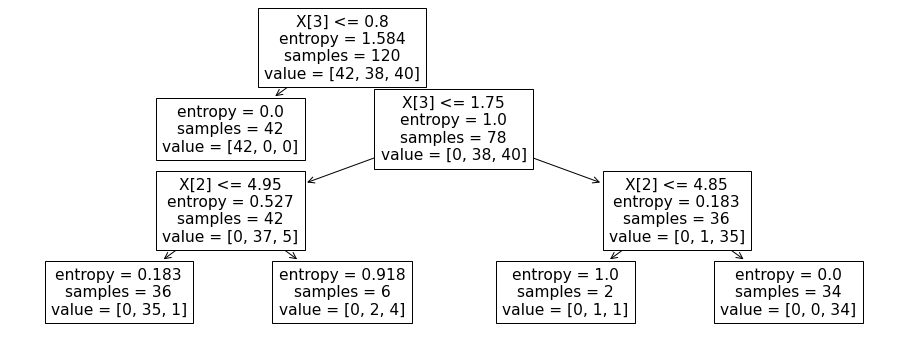

In [14]:
#PLot the decision tree
plt.figure(figsize=(16,6))
tree.plot_tree(model);

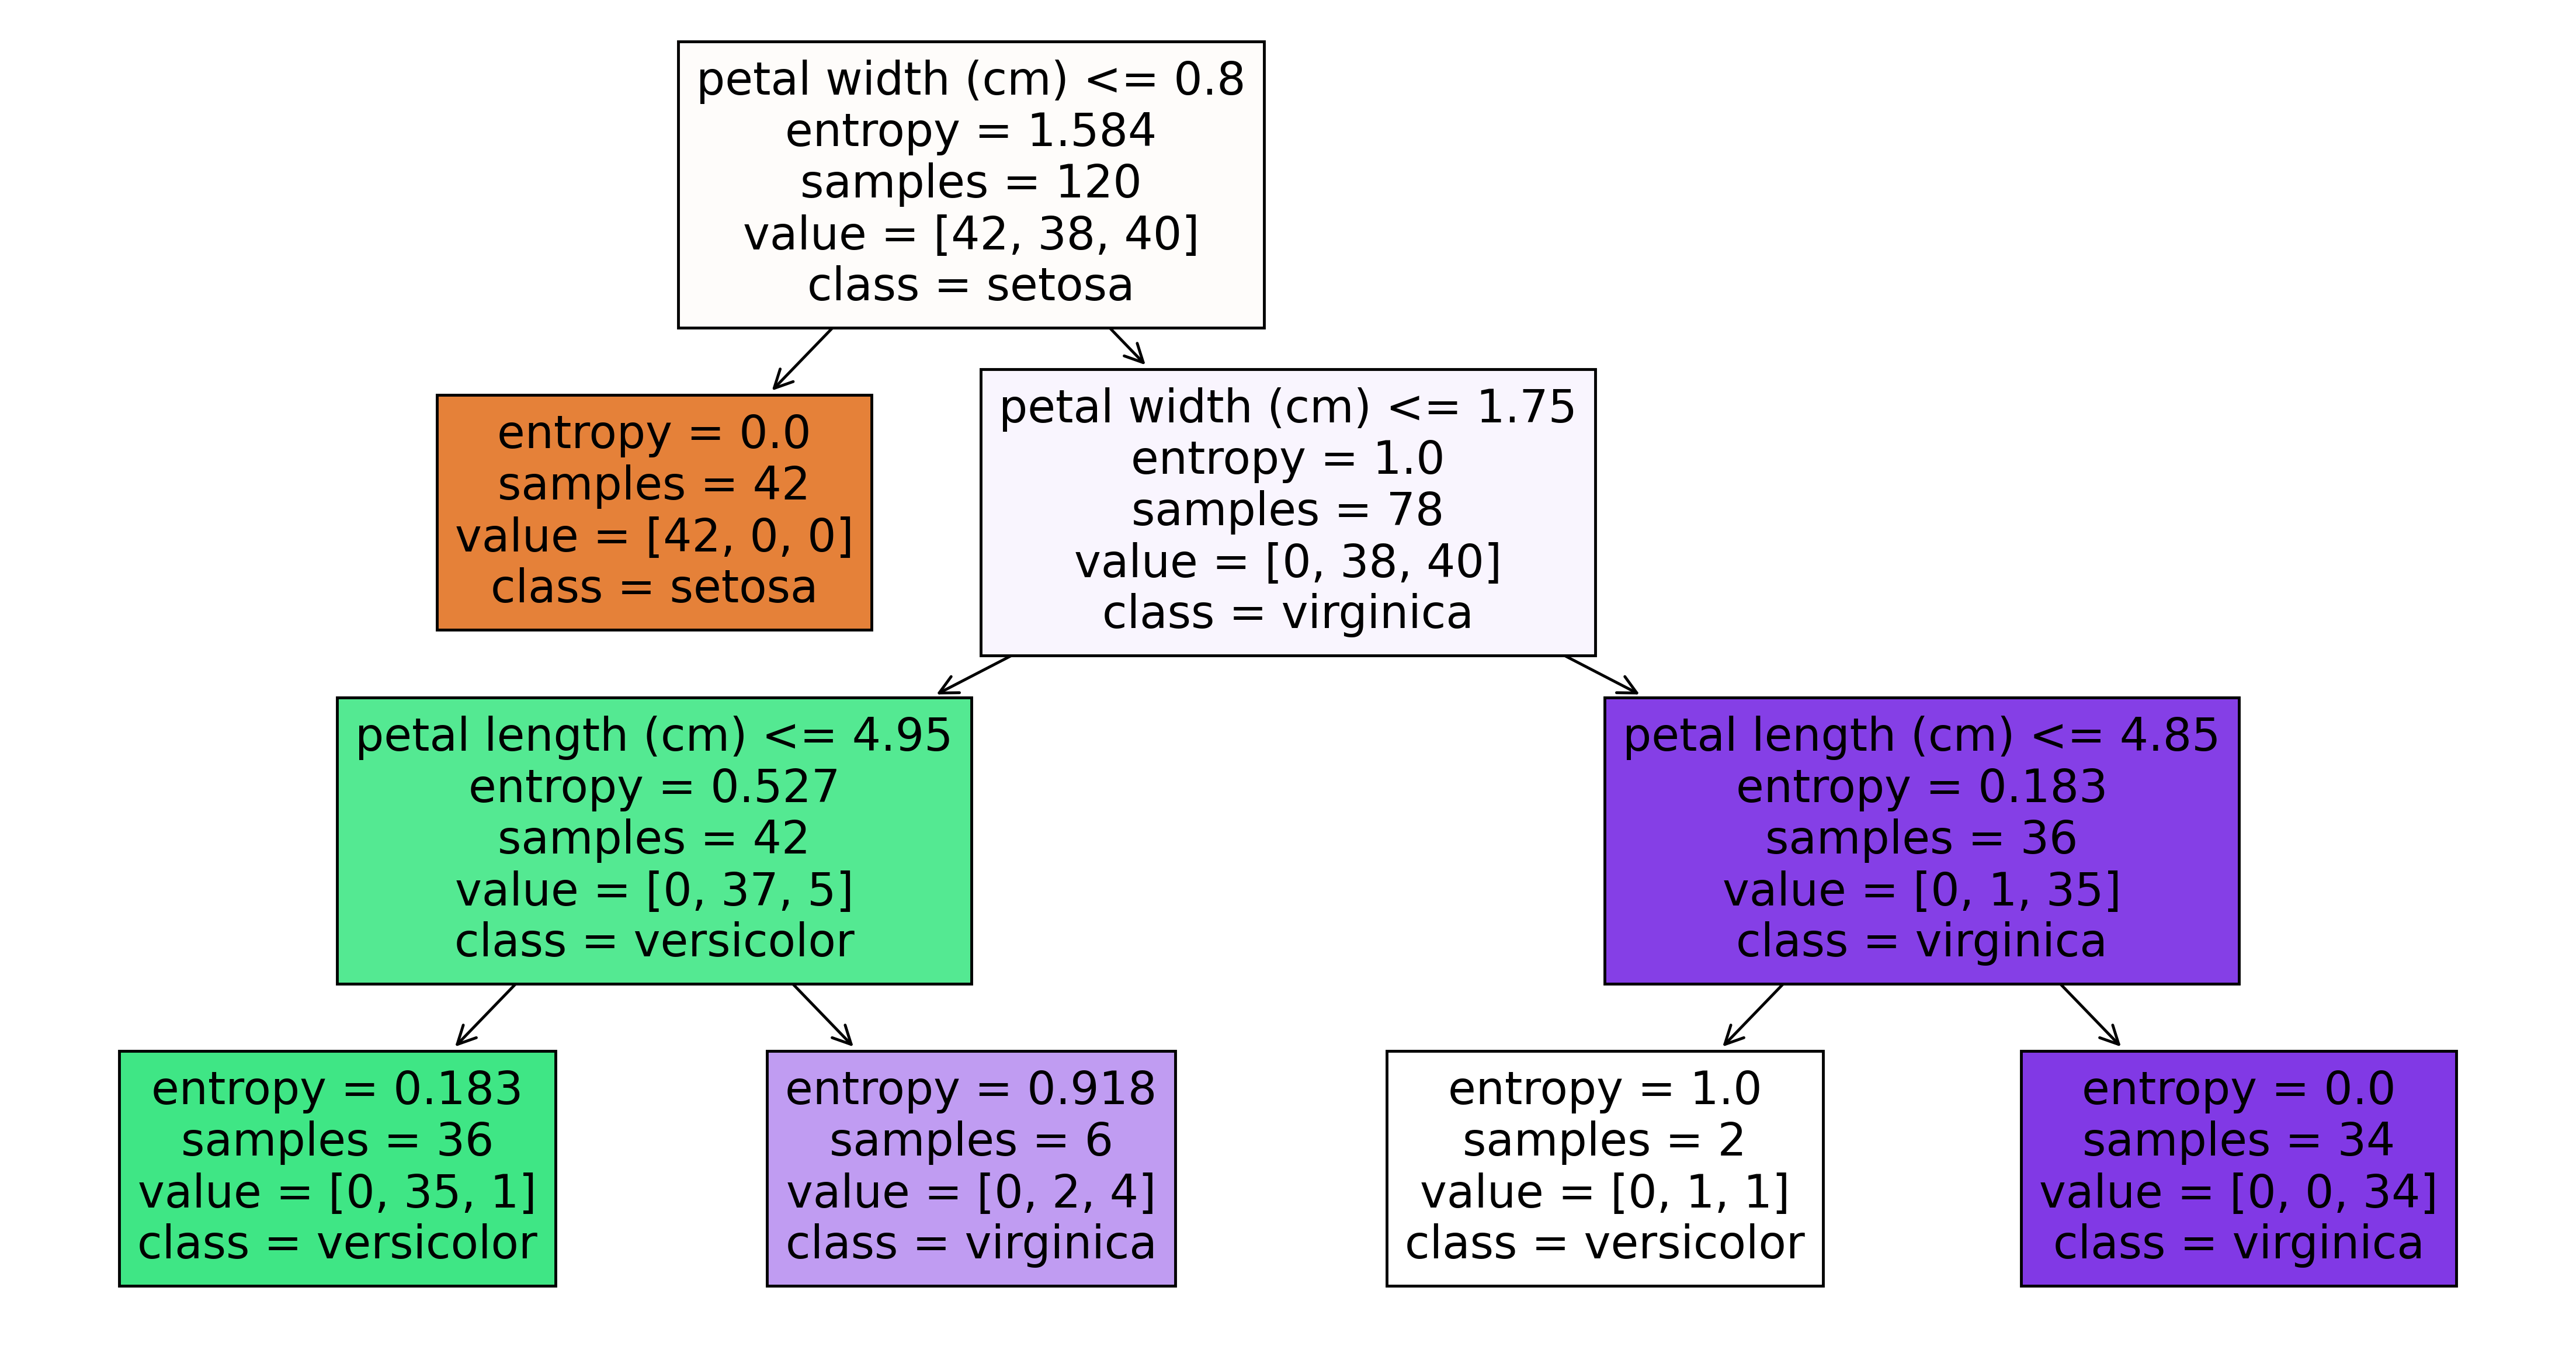

In [15]:
#A Fancy Decision Tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (16,8.5), dpi=350)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [16]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.DataFrame(preds).value_counts() # getting the count of each category 

1    13
2     9
0     8
dtype: int64

In [17]:
#The preds value for each datapoint in the Test Dataset 
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [18]:
#Getting the 2 way table to understand the correct and wrong predictions -- Confusion Matrix
pd.crosstab(y_test,preds)

col_0,0,1,2
species,,,
0,8,0,0
1,0,12,0
2,0,1,9


In [19]:
#Accuracy 
np.mean(preds==y_test)

0.9666666666666667

Inference: The Final Accuracy of the is 0.96

#### Building Decision Tree Classifier (CART) using Gini Criteria

In [20]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [21]:
#Fitting the Model on Train Dataset
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

Inference: Model is Fitted, The Decision Tree is of CART Technique, Pruning is Set using the Hyperparameter of max_depth = 3, while means only Three Split/Node will be there.

In [22]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.DataFrame(preds).value_counts() # getting the count of each category 

1    13
2     9
0     8
dtype: int64

In [23]:
#Accuracy 
np.mean(preds==y_test)

0.9666666666666667

Inference: The Final Accuracy of the is 0.96 which is Came Same as per C5.0 too 

#### Decision Tree Regression Example

In [24]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [25]:
array = iris.values
X = array[:,0:3]
Y = array[:,3]

In [26]:
# Splitting data into training and testing data set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.33,random_state=1)

Inference: Made a Train-Test Split of 67% - 33%

In [27]:
#Building The Model & Fitting It on the Train Dataset
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [28]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
preds

array([0.1, 1. , 1.3, 0.1, 2.2, 1.4, 1.5, 0.2, 0.2, 2.3, 1.3, 0.2, 1.6,
       1.5, 1.6, 0.2, 1. , 1.2, 0.2, 0.2, 1.3, 1.2, 1.5, 0.2, 2.5, 1.3,
       0.1, 0.4, 1.4, 1.5, 1.4, 2.1, 1.3, 2.2, 1.9, 0.2, 1.1, 0.2, 1.5,
       2.4, 2.1, 0.2, 1.6, 2.2, 1.5, 2. , 0.2, 0.2, 0.1, 1.3])

Inference: Above Are the Predicted Value.

In [29]:
#Find the accuracy
model.score(X_test,Y_test)

0.8754352263176852

Inference: This is the Final Accuracy of the Regression Model which is 0.87, Used Model.score() Function to Compare The Predicted and Actual value percentage/Accuracy